In [1]:
import numpy as np

from sklearn import cluster
from scipy.cluster import hierarchy

import matplotlib.pyplot as plt

import walsdata
from walsdata import s229d
import langmap

In [2]:
s229d.values_scaled_imputed

,1A,2A,3A,4A_2,4A_3,5A_1,5A_3,5A_4,6A_2,6A_3,...,143A_2,143A_3,143A_4,143A_6,143G_1,144A_1,144A_2,144A_3,144A_4,144A_5
Language_ID,,,,,,,,,,,,,,,,,,,,,
abk,1.00,0.0,1.00,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
aeg,0.75,0.5,0.75,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
ain,0.00,0.5,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
akn,0.50,1.0,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ala,0.25,1.0,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yko,0.50,0.5,0.50,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
yor,0.25,1.0,0.25,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
yuc,1.00,0.5,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Baseline

Here, we check what hierarchical clustering looks like when there's no structure at all by randomizing the columns

In [3]:
shuffle229 = s229d.values_scaled_imputed.copy()

In [4]:
state = np.random.RandomState(229)
for col in shuffle229.columns:
    shuffle229[col] = state.permutation(shuffle229[col].values)

In [5]:
shuffle229

,1A,2A,3A,4A_2,4A_3,5A_1,5A_3,5A_4,6A_2,6A_3,...,143A_2,143A_3,143A_4,143A_6,143G_1,144A_1,144A_2,144A_3,144A_4,144A_5
Language_ID,,,,,,,,,,,,,,,,,,,,,
abk,0.50,0.0,0.50,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
aeg,0.50,1.0,1.00,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ain,0.00,1.0,0.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
akn,0.75,1.0,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ala,0.50,0.5,0.75,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yko,0.50,0.5,0.00,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yor,0.25,1.0,0.75,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
yuc,0.25,1.0,0.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
shuffle_linkage = hierarchy.linkage(shuffle229, method='ward')

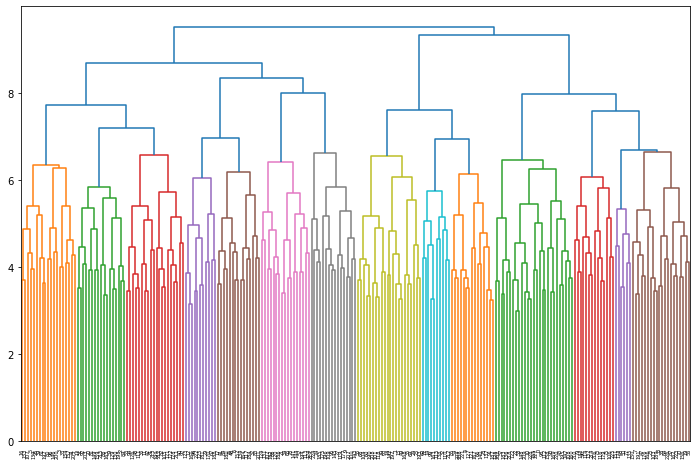

In [7]:
plt.subplots(figsize=(12, 8))
hierarchy.dendrogram(shuffle_linkage)
plt.show()

### Full cluster

In [8]:
linkage = hierarchy.linkage(s229d.values_scaled_imputed, method='ward')

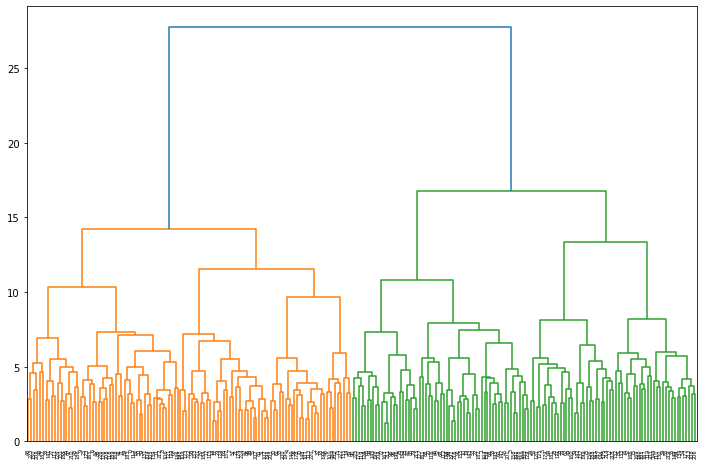

In [9]:
plt.subplots(figsize=(12, 8))
hierarchy.dendrogram(linkage)
plt.show()

In [10]:
c2 = hierarchy.fcluster(linkage, t=20, criterion='distance')

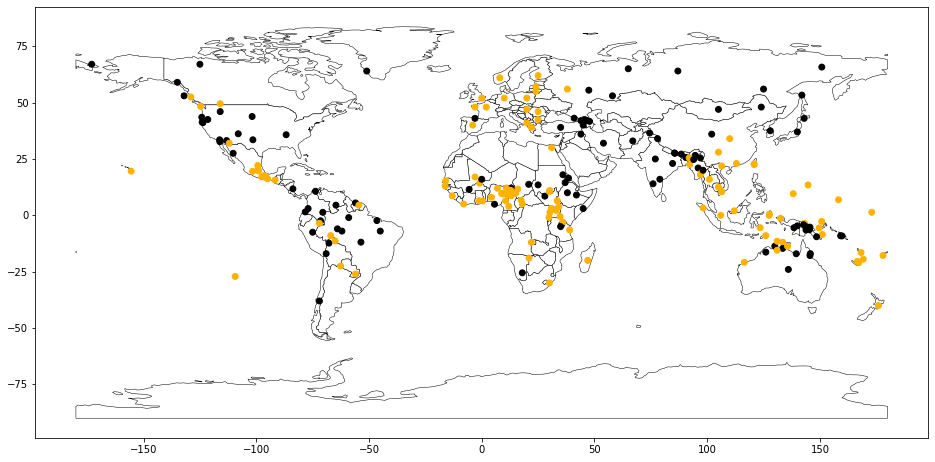

In [11]:
langmap.plot(s229d.langs, labels=c2)

In [12]:
c3 = hierarchy.fcluster(linkage, t=15, criterion='distance')

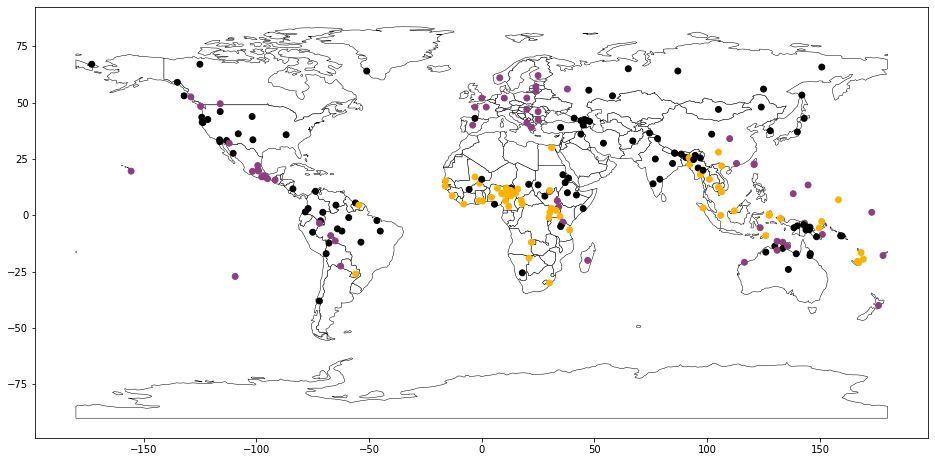

In [13]:
langmap.plot(s229d.langs, labels=c3)

In [14]:
sorted({v3: v2 for v3, v2 in zip(c3, c2)}.items())

[(1, 1), (2, 2), (3, 2)]

In [15]:
c5 = hierarchy.fcluster(linkage, t=12, criterion='distance')

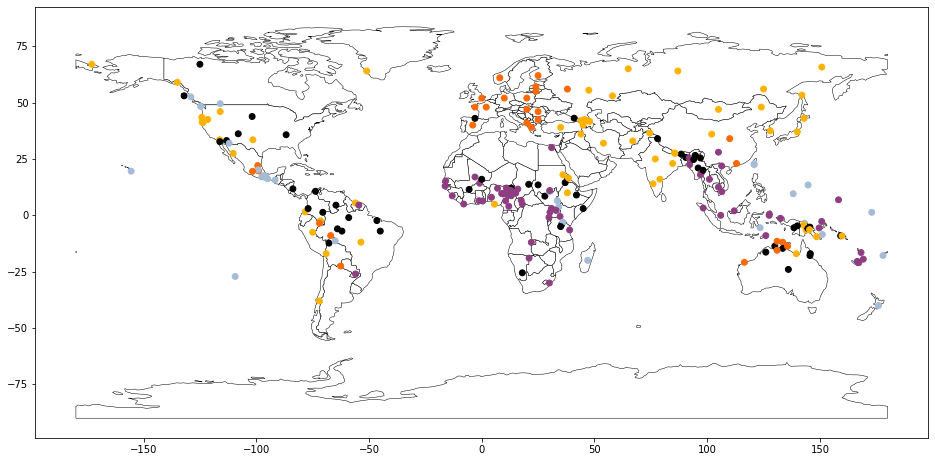

In [16]:
langmap.plot(s229d.langs, labels=c5)

In [17]:
sorted({v5: v3 for v5, v3 in zip(c5, c3)}.items())

[(1, 1), (2, 1), (3, 2), (4, 3), (5, 3)]

In [18]:
c9 = hierarchy.fcluster(linkage, t=8, criterion='distance')

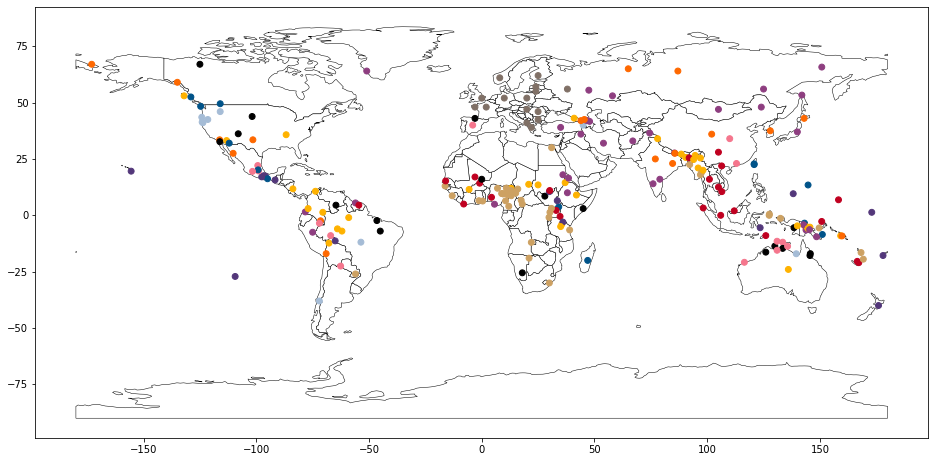

In [19]:
langmap.plot(s229d.langs, labels=c9)

In [20]:
sorted({v9: v2 for v9, v2 in zip(c9, c2)}.items())

[(1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 2),
 (7, 2),
 (8, 2),
 (9, 2),
 (10, 2),
 (11, 2)]

In [21]:
def most_distinct_features(sample, labels, cluster1, cluster2, count=10):
    values = sample.values_scaled_imputed
    if cluster1 in values.index:
        avg1 = values.loc[cluster1]
    else:
        avg1 = values[labels == cluster1].mean()
    if cluster2 in values.index:
        avg2 = values.loc[cluster2]
    else:
        avg2 = values[labels == cluster2].mean()
    diff = (avg1 - avg2).abs()
    diff_sorted = diff.sort_values(ascending=False)
    if count is None:
        head = diff_sorted[diff_sorted > 0]
    else:
        head = diff_sorted.head(count)
    result = head.to_frame('diff')
    result['shortname'] = result.index.map(walsdata.get_shortname)
    result = result.reindex(['shortname', 'diff'], axis=1)
    result[f'cluster{cluster1}'] = avg1
    result[f'cluster{cluster2}'] = avg2
    return result

In [22]:
def label_for(sample, labels, language):
    return labels[sample.values_scaled_imputed.index.get_loc(language)]

In [23]:
most_distinct_features(s229d, c2, 1, 2)

,shortname,diff,cluster1,cluster2
83A_2,ov_order__vo,0.931669,0.009009,0.940678
83A_1,ov_order__ov,0.892426,0.900901,0.008475
81A_1,order__sov,0.838372,0.846847,0.008475
85A_1,adpositions__postpositions,0.760319,0.870488,0.110169
85A_2,adpositions__prepositions,0.715960,0.045045,0.761005
81A_2,order__svo,0.668423,0.018018,0.686441
86A_1,genitives__before_noun,0.628646,0.882883,0.254237
86A_2,genitives__after_noun,0.555581,0.063063,0.618644
69A_2,tense_aspect__suffixes,0.438547,0.767184,0.328637
88A_2,demonstratives__after_noun,0.410992,0.190703,0.601695


This lines up pretty well with the existing notion of "head-final" (cluster 1) vs "head-initial" (cluster 2) languages: cluster-1 languages are distinguished by SOV word order, postpositions, and genitives and demonstratives before the noun.

In [24]:
most_distinct_features(s229d, c3, 2, 3)

,shortname,diff,cluster2,cluster3
88A_2,demonstratives__after_noun,0.654875,0.918033,0.263158
82A_1,sv_order__sv,0.617486,0.950820,0.333333
89A_2,numerals__after_noun,0.610235,0.754098,0.143864
88A_1,demonstratives__before_noun,0.599942,0.049180,0.649123
89A_1,numerals__before_noun,0.591541,0.229508,0.821049
93A_1,content_questions__initial,0.517975,0.131148,0.649123
82A_2,sv_order__vs,0.509922,0.016393,0.526316
93A_2,content_questions__non_initial,0.493232,0.770492,0.277260
81A_2,order__svo,0.479436,0.918033,0.438596
143A_1,negative_order__before_verb,0.449813,0.409836,0.859649


This seems to split between the more prototypical head-initial languages (SVO, nouns at the beginning of noun phrases) from cluster 3, which is more of a mixed bag (that's where English is).

In [25]:
most_distinct_features(s229d, c5, 1, 2)

,shortname,diff,cluster1,cluster2
87A_2,adjectives__after_noun,0.836050,0.903846,0.067797
87A_1,adjectives__before_noun,0.825945,0.038462,0.864407
89A_1,numerals__before_noun,0.720315,0.154197,0.874512
89A_2,numerals__after_noun,0.660341,0.768880,0.108539
51A_1,case__suffixes,0.447197,0.230769,0.677966
88A_1,demonstratives__before_noun,0.409265,0.519688,0.928953
88A_2,demonstratives__after_noun,0.400139,0.403389,0.003250
33A_2,plurals__suffix,0.312961,0.395164,0.708125
6A_3,uvular__continuants,0.285854,0.019231,0.305085
6A_2,uvular__stops,0.238266,0.134615,0.372881


In [26]:
most_distinct_features(s229d, c5, 4, 5)

,shortname,diff,cluster4,cluster5
82A_2,sv_order__vs,0.860837,0.103448,0.964286
69A_2,tense_aspect__suffixes,0.747310,0.854453,0.107143
33A_2,plurals__suffix,0.739626,0.896552,0.156925
81A_2,order__svo,0.721675,0.793103,0.071429
82A_1,sv_order__sv,0.584975,0.620690,0.035714
144A_1,negative_word__initial,0.571429,0.000000,0.571429
144A_3,negative_word__second,0.517241,0.517241,0.000000
88A_1,demonstratives__before_noun,0.503695,0.896552,0.392857
81A_3,order__vso,0.500000,0.000000,0.500000
51A_1,case__suffixes,0.473152,0.551724,0.078572


### What's going on with particular languages?

In [27]:
most_distinct_features(s229d, None, 'fre', 'spa', count=None)

,shortname,diff,clusterfre,clusterspa
144A_5,negative_word__mixed,1.0,1.0,0.0
11A_3,front_round__high,1.0,1.0,0.0
51A_7,case__pre_clitics,1.0,1.0,0.0
4A_2,voicing__plosives,1.0,1.0,0.0
19A_5,present__th_sounds,1.0,0.0,1.0
5A_1,plosive_gap__other,1.0,0.0,1.0
144A_3,negative_word__second,1.0,0.0,1.0
82A_3,sv_order__mixed,1.0,0.0,1.0
116A_1,polar_questions__particle,1.0,1.0,0.0
6A_3,uvular__continuants,1.0,1.0,0.0


In [28]:
label_for(s229d, c2, 'eng')

2

In [29]:
label_for(s229d, c2, 'fre')

2

In [30]:
label_for(s229d, c2, 'spa')

2

In [31]:
label_for(s229d, c2, 'jpn')

1

In [32]:
label_for(s229d, c2, 'bsq')

1

In [33]:
label_for(s229d, c2, 'tur')

1

In [34]:
label_for(s229d, c2, 'nav')

1

In [35]:
label_for(s229d, c2, 'haw')

2

In [36]:
label_for(s229d, c2, 'kor')

1